In [34]:
#import necessary packages 
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re

In [35]:
def myStrip(i):
    a = 0
    for a in range(0, len(i) ,1):
       i[a] = i[a].string
    #print(i)
    return i

    
    

In [36]:
#MAKE A REQUEST OF URL

page = requests.get("https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating")

#PARSE HTLM
soup1 = BeautifulSoup(page.content, 'html.parser')

### Strip the data that we need 

In [37]:



#Using Soup Combo selector

#first selects anchor tags withing each h3 tag
Moviename = soup1.select("h3 a")

#this was more difficult, search by css class and then pick the 3rd p tag down within the class
Description = soup1.select(".lister-item-content > p:nth-of-type(2)")

#this is easy, the target has its own class
Releasedate = soup1.select(".lister-item-year")


Directorname = soup1.select("p > a:nth-of-type(1)")
#you can do multple selections with commas
Stars = soup1.select("p > a:nth-of-type(2), p > a:nth-of-type(3),p > a:nth-of-type(4),p > a:nth-of-type(5)")

#classes begin with dot notation, tags are alone, this selector looks for all strong tags that are within a div tag with the inline-block class
Rating = soup1.select(".inline-block strong")

Genres = soup1.select(".genre")
Duration = soup1.select(".runtime")

#this is for later as we have to drill down the page 
#Filmingdatas = soup.find_all(class_="") 


#now we strip all tags with a custom function
Moviename = myStrip(Moviename) ; Description = myStrip(Description) ; Releasedate = myStrip(Releasedate) ; Directorname = myStrip(Directorname); Rating = myStrip(Rating); Genres = myStrip(Genres); Duration = myStrip(Duration); Stars = myStrip(Stars)






#### There's a problem with the Director -- We will look at this later. I suspect some movies have more than one director

In [42]:
print(len(Moviename));print(len(Description));print(len(Releasedate));print(len(Directorname));print(len(Rating)); print(len(Genres)); print(len(Duration)); print(len(Stars))

100
100
100
107
100
100
100
400


#### Uh Oh, We have problems!! All the lists are not equal! The stars with 400 items should be an easy fix, we will just put it its own dataframe and then reshape it...but there is definetly something "odd" (sorry I couldn't help myself) with the Directors count. It could be that some movies have more than one director. We'll fix it later but first lets have something to show for our efforts


### Now to build the Dataframe



In [43]:
BuildFrame = {'Title':Moviename, 'Description':Description, 'ReleaseYear':Releasedate, 'Rating': Rating, 'Genres':Genres, 'Duration':Duration}
df = pd.DataFrame(BuildFrame)
df.head(5)

,Title,Description,ReleaseYear,Rating,Genres,Duration
0,Le ali della libertà,\n Two imprisoned men bond over a number of...,(1994),9.3,\nDrama,142 min
1,Il padrino,\n The aging patriarch of an organized crim...,(1972),9.2,"\nCrime, Drama",175 min
2,Il cavaliere oscuro,\n When the menace known as the Joker wreak...,(2008),9.0,"\nAction, Crime, Drama",152 min
3,Il padrino - Parte II,\n The early life and career of Vito Corleo...,(1974),9.0,"\nCrime, Drama",202 min
4,La parola ai giurati,\n A jury holdout attempts to prevent a mis...,(1957),9.0,"\nCrime, Drama",96 min


## Cleanup work
##### If you look above you notice some pesky \n's. Also the the Release year is enclosed in parenthese  (we don't need that) and the duration has "min" at the end. Let's try and clean any integer for easier plotting to come later

In [44]:
df.replace("\n","", regex=True, inplace=True)
df.ReleaseYear.replace(("\D"),"", regex=True, inplace=True)
df.Duration.replace(("\D"),"", regex=True, inplace=True)
df.head(5)

,Title,Description,ReleaseYear,Rating,Genres,Duration
0,Le ali della libertà,Two imprisoned men bond over a number of y...,1994,9.3,Drama,142
1,Il padrino,The aging patriarch of an organized crime ...,1972,9.2,"Crime, Drama",175
2,Il cavaliere oscuro,When the menace known as the Joker wreaks ...,2008,9.0,"Action, Crime, Drama",152
3,Il padrino - Parte II,The early life and career of Vito Corleone...,1974,9.0,"Crime, Drama",202
4,La parola ai giurati,A jury holdout attempts to prevent a misca...,1957,9.0,"Crime, Drama",96


### Looking good!
##### Now lets make sure the Rating and duration are of types float and integer, respctively

In [45]:
df.Rating = df.Rating.astype(float)
df.Duration = df.Duration.astype(int)

#### Now lets work on the "Stars Category"


##### First we will create a numpy array

In [46]:
Stars = np.array(Stars) 

# now lets reshape it
Stars = Stars.reshape(100, 4)


Stars = pd.DataFrame(Stars)
Stars.head(5)

,0,1,2,3
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [51]:
Stars = Stars.columns['Star-1', 'Star-2', 'Star-3', 'Star-4']
Stars.head(3)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:

testtree = soup1.selct(".inline-block strong").text

testtree = myStrip(testtree)
print('new')




# def myStrip(i):
#     a = 0
#     for a in range(0, len(i) ,1):
#        i[a] = i[a].text
#        #i[a] = i[a].replace('\n', '')
#        #i[a] = re.sub(r"[^1-9a-zA-Z: ]+", "", i[a])
#        #i[a] = i[a][1:-4]


#myStrip(Moviename)
#print(Moviename)
# print(testtree)

TypeError: 'NoneType' object is not callable

In [122]:
Moviename1 = Moviename
print(Moviename1)

['\n1.\nThe Shawshank Redemption\n(1994)\n', '\n2.\nThe Godfather\n(1972)\n', '\n3.\nThe Dark Knight\n(2008)\n', '\n4.\nThe Godfather: Part II\n(1974)\n', '\n5.\n12 Angry Men\n(1957)\n', '\n6.\nThe Lord of the Rings: The Return of the King\n(2003)\n', '\n7.\nPulp Fiction\n(1994)\n', "\n8.\nSchindler's List\n(1993)\n", '\n9.\nInception\n(2010)\n', '\n10.\nSoorarai Pottru\n(2020)\n', '\n11.\nFight Club\n(1999)\n', '\n12.\nThe Lord of the Rings: The Fellowship of the Ring\n(2001)\n', '\n13.\nForrest Gump\n(1994)\n', '\n14.\nThe Good, the Bad and the Ugly\n(1966)\n', '\n15.\nThe Lord of the Rings: The Two Towers\n(2002)\n', '\n16.\nThe Matrix\n(1999)\n', '\n17.\nGoodfellas\n(1990)\n', '\n18.\nStar Wars: Episode V - The Empire Strikes Back\n(1980)\n', "\n19.\nOne Flew Over the Cuckoo's Nest\n(1975)\n", '\n20.\nHamilton\n(2020)\n', '\n21.\nParasite\n(2019)\n', '\n22.\nInterstellar\n(2014)\n', '\n23.\nCity of God\n(2002)\n', '\n24.\nSpirited Away\n(2001)\n', '\n25.\nSaving Private Ryan\n(1998

In [140]:

beginFrame = {'Title':Moviename1}
dframe = pd.DataFrame(beginFrame)



#dframe['Title'] = Moviename1 


dframe[['run','tur','re','2','3']] = dframe.Title.str.split("/n", expand=True)
dframe


ValueError: Columns must be same length as key

In [131]:
page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&view=advanced")
soup_href = BeautifulSoup(page.content, 'html.parser')

for i in range(0,110):
    href = soup_href.find_all(class_="lister-item-index unbold text-primary", href=True)
    for i in href:
        x = href.get_text()
        print(x)

# This cell is just for production purpose to have the numbers to check the function below
imdb = pd.read_csv("/home/jovyan/work/IMDbTop1000SortedbyI1.csv")
get_list = imdb['Field1_Link'].tolist()
tt_numbers = []

for i in get_list:
    tt_numbers.append(re.sub('\D', '', i))
filming_dates= []
for i in tt_numbers:
    page = requests.get("https://www.imdb.com/title/tt{}/locations?ref_=tt_dt_dt".format(i))
    soup = BeautifulSoup(page.content, 'html.parser')
    x = soup.find_all(class_="ipl-zebra-list__item")

    for i in x:
        filming_dates.append(i.get_text().replace('\n', '').strip())
        
# print(filming_dates)
df = pd.DataFrame(filming_dates, columns= ['Filming Dates'])

df

,Filming Dates
0,16 June 1993 - 10 September 1993
1,29 March 1971 - 6 August 1971
2,18 April 2007 - 11 November 2007
3,1 October 1973 - 19 June 1974
4,June 1956 - July 1956
...,...
100,13 January 2003 - 3 April 2003
101,18 October 1999 - 12 December 1999
102,19 April 1999 - 16 June 1999
103,April 1999


In [133]:
Timdb = pd.concat([imdb,df],axis=1)
PPP=Timdb.drop([100,101,102,103,104])
PPP=PPP.drop(columns = ['Field10_Link','Field9_Link','Field8_Link','Field7_Link','Field6_Link'])
#Timdb

PPP





,Movie_Name,Field1_Link,Time,Genre,Year,Rating,Description,Director,Actor,Actor_2,Actor_3,Actor_4,Filming Dates
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=adv...,142 min,Drama,(1994),9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,16 June 1993 - 10 September 1993
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=adv...,175 min,"Crime, Drama",(1972),9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,29 March 1971 - 6 August 1971
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=adv...,152 min,"Action, Crime, Drama",(2008),9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,18 April 2007 - 11 November 2007
3,The Godfather: Part II,https://www.imdb.com/title/tt0071562/?ref_=adv...,202 min,"Crime, Drama",(1974),9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1 October 1973 - 19 June 1974
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=adv...,96 min,"Crime, Drama",(1957),9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,June 1956 - July 1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Eternal Sunshine of the Spotless Mind,https://www.imdb.com/title/tt0338013/?ref_=adv...,108 min,"Drama, Romance, Sci-Fi",(2004),8.3,"When their relationship turns sour, a couple u...",Michel Gondry,Jim Carrey,Kate Winslet,Tom Wilkinson,Gerry Robert Byrne,1 January 1939 - 2 October 1940
96,Amélie,https://www.imdb.com/title/tt0211915/?ref_=adv...,122 min,"Comedy, Romance",(2001),8.3,Amélie is an innocent and naive girl in Paris ...,Jean-Pierre Jeunet,Audrey Tautou,Mathieu Kassovitz,Rufus,Lorella Cravotta,1 April 2019 - 7 June 2019
97,Snatch,https://www.imdb.com/title/tt0208092/?ref_=adv...,102 min,"Comedy, Crime",(2000),8.3,"Unscrupulous boxing promoters, violent bookmak...",Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,11 November 2011
98,Requiem for a Dream,https://www.imdb.com/title/tt0180093/?ref_=adv...,102 min,Drama,(2000),8.3,The drug-induced utopias of four Coney Island ...,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,2004 - 2010


KeyError: ('Rating', 'Movie_Rating')

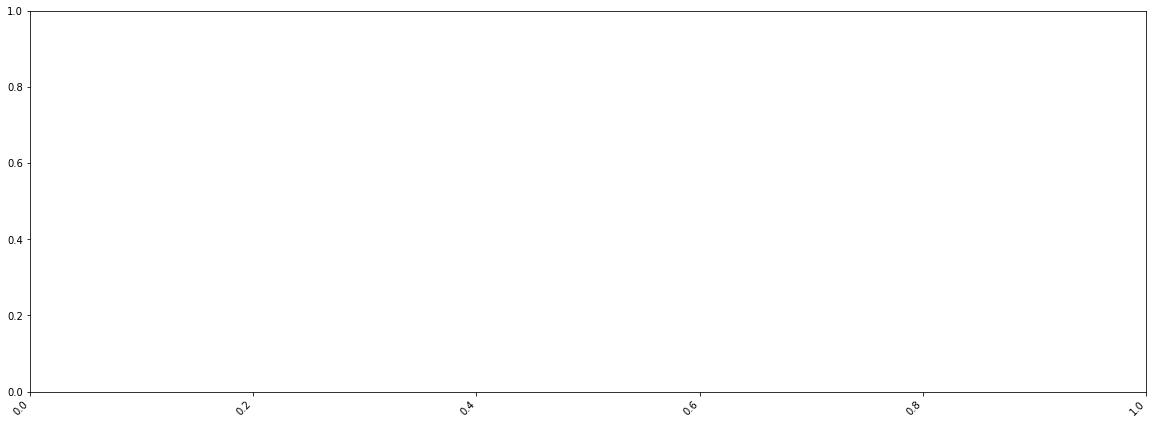

In [244]:
# Movies' Rating by Year.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Year'],PPP['Rating','Movie_Rating'])
#plt.xlabel['YearofRelease']
#plt.ylabel['Rating']
#plt.title['Movies Rating by Year']
#plt.grid[True]
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

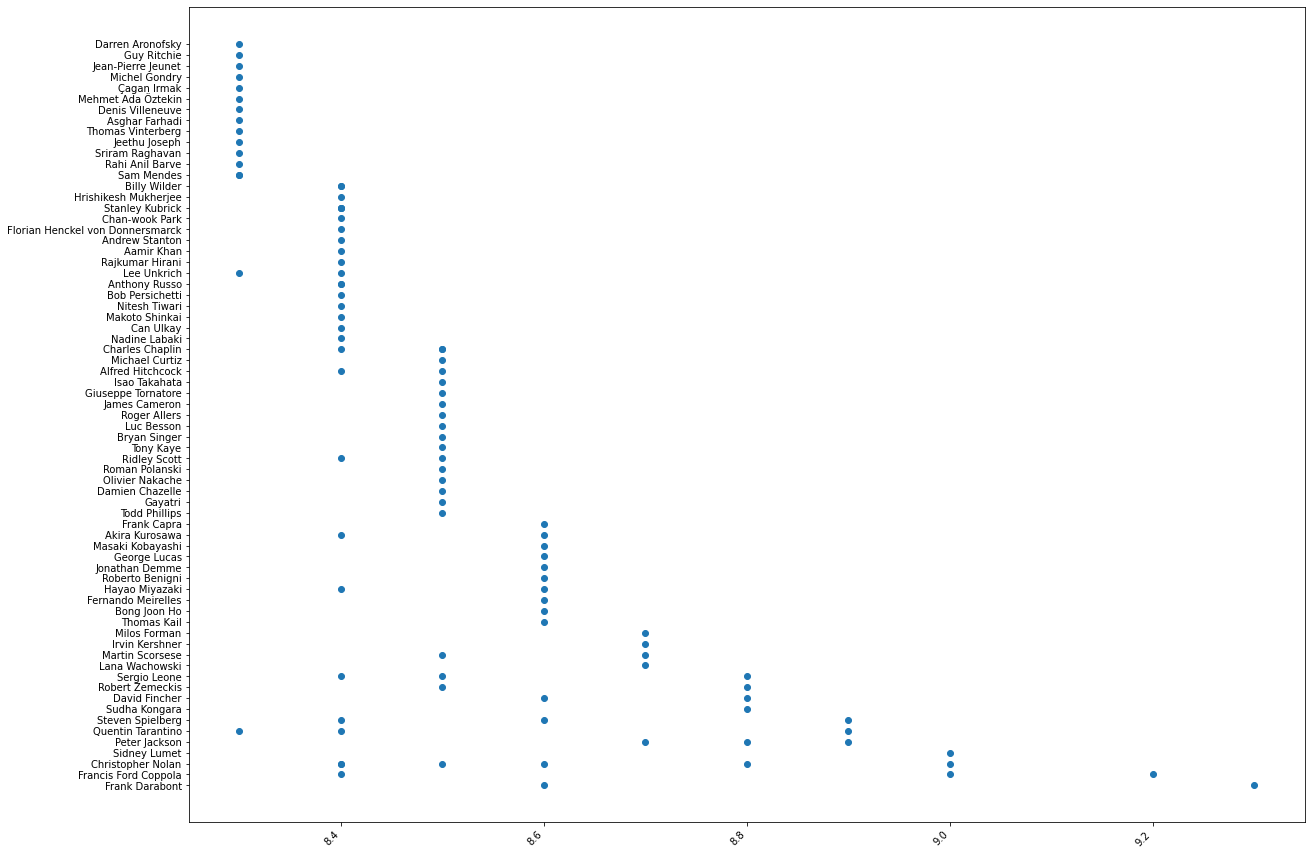

In [235]:
# Number Movies' in top 100 by Director.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Director'],PPP['Rating'])
#plt.xlabel['YearofRelease']
#plt.ylabel['Rating']
#plt.title['Movies Rating by Year']
#plt.grid[True]
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

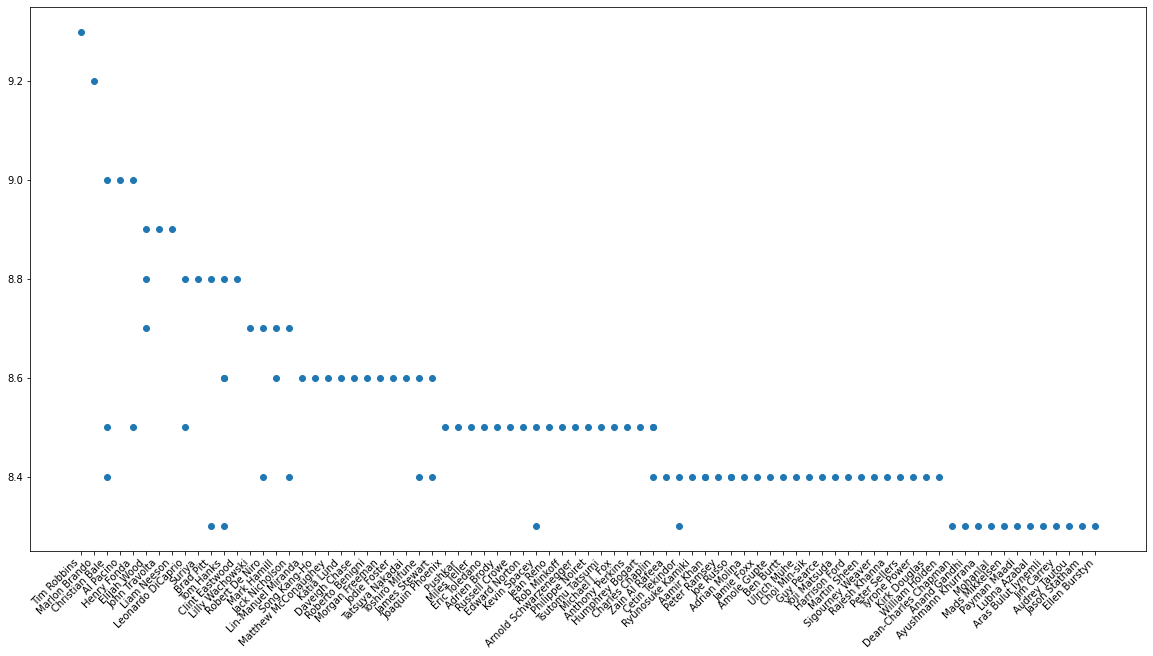

In [242]:
# Number of Movies' in top 100 by Actor.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha='right')
plt.scatter(PPP['Actor'],PPP['Rating'])
#plt.xlabel['YearofRelease']
#plt.ylabel['Rating']
#plt.title['Movies Rating by Year']
#plt.grid[True]
plt.legend

In [243]:
#Rating
# Time

#PPP1 = PPP
#PP1[minmax] = 

tempdf = PPP1[['Time', 'Rating']]

time_list = []
for i in PPP1['Time']:
    time_list.append(int(re.sub('\D', '', i)))

df_time = pd.DataFrame(time_list)

normalized_df=(df_time-df_time.min())/(df_time.max()-df_time.min())
normalized_df


,0
0,0.387324
1,0.619718
2,0.457746
3,0.809859
4,0.063380
...,...
95,0.147887
96,0.246479
97,0.105634
98,0.105634


In [220]:

normalized_Ratings=(PPP["Rating"]-PPP["Rating"].min())/(PPP["Rating"].max()-PPP["Rating"].min())
normalized_Ratings

0     1.0
1     0.9
2     0.7
3     0.7
4     0.7
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Rating, Length: 100, dtype: float64

In [222]:
e = df_time
normalized_time=(e-e.min())/(e.max()-e.min())
normalized_time

,0
0,0.387324
1,0.619718
2,0.457746
3,0.809859
4,0.063380
...,...
95,0.147887
96,0.246479
97,0.105634
98,0.105634


In [239]:
PPP


,Movie_Name,Field1_Link,Time,Genre,Year,Rating,Description,Director,Actor,Actor_2,Actor_3,Actor_4,Filming Dates
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=adv...,142 min,Drama,(1994),9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,16 June 1993 - 10 September 1993
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=adv...,175 min,"Crime, Drama",(1972),9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,29 March 1971 - 6 August 1971
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=adv...,152 min,"Action, Crime, Drama",(2008),9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,18 April 2007 - 11 November 2007
3,The Godfather: Part II,https://www.imdb.com/title/tt0071562/?ref_=adv...,202 min,"Crime, Drama",(1974),9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1 October 1973 - 19 June 1974
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=adv...,96 min,"Crime, Drama",(1957),9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,June 1956 - July 1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Eternal Sunshine of the Spotless Mind,https://www.imdb.com/title/tt0338013/?ref_=adv...,108 min,"Drama, Romance, Sci-Fi",(2004),8.3,"When their relationship turns sour, a couple u...",Michel Gondry,Jim Carrey,Kate Winslet,Tom Wilkinson,Gerry Robert Byrne,1 January 1939 - 2 October 1940
96,Amélie,https://www.imdb.com/title/tt0211915/?ref_=adv...,122 min,"Comedy, Romance",(2001),8.3,Amélie is an innocent and naive girl in Paris ...,Jean-Pierre Jeunet,Audrey Tautou,Mathieu Kassovitz,Rufus,Lorella Cravotta,1 April 2019 - 7 June 2019
97,Snatch,https://www.imdb.com/title/tt0208092/?ref_=adv...,102 min,"Comedy, Crime",(2000),8.3,"Unscrupulous boxing promoters, violent bookmak...",Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,11 November 2011
98,Requiem for a Dream,https://www.imdb.com/title/tt0180093/?ref_=adv...,102 min,Drama,(2000),8.3,The drug-induced utopias of four Coney Island ...,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,2004 - 2010
